
# Dataset : Iris Flower
 To classify the flower into one of the three species - Setosa, Versicolor, Virginica using decision tree classifier


In [ ]:
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

## **Load the dataset**

In [ ]:
iris_data = pd.read_csv("Iris.csv")
iris_df = iris_data.drop(["Id"],axis=1)
iris_df = iris_df.drop(["Species"],axis=1)
header_list = iris_df.columns
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Extract Training and testing dataset

In [ ]:
target_names = ['Iris-setosa','Iris-versicolor', 'Iris-virginica']
encode_species = LabelEncoder()
y = encode_species.fit_transform(iris_data["Species"])
X_train, X_test, y_train, y_test = train_test_split(iris_df,y,test_size=0.4,random_state=42)
print("Size of Training Data: ",y_train.size,"\nSize of Testing Data : ",y_test.size)


Size of Training Data:  90 
Size of Testing Data :  60


# Fit the algorithm to traning data

In [ ]:
iris_model = DecisionTreeClassifier(max_depth =3, random_state = 31)
iris_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=31, splitter='best')

# Predict the class from Testing data

In [ ]:
test_pred = iris_model.predict(X_test)
print(test_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2 1 2 1 0 2 1 0 0 0 1]


# Accuracy to find out performance of the model

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of testing data : ",accuracy_score(y_test, test_pred))

Accuracy of testing data :  0.9833333333333333


# visualize the decision tree 

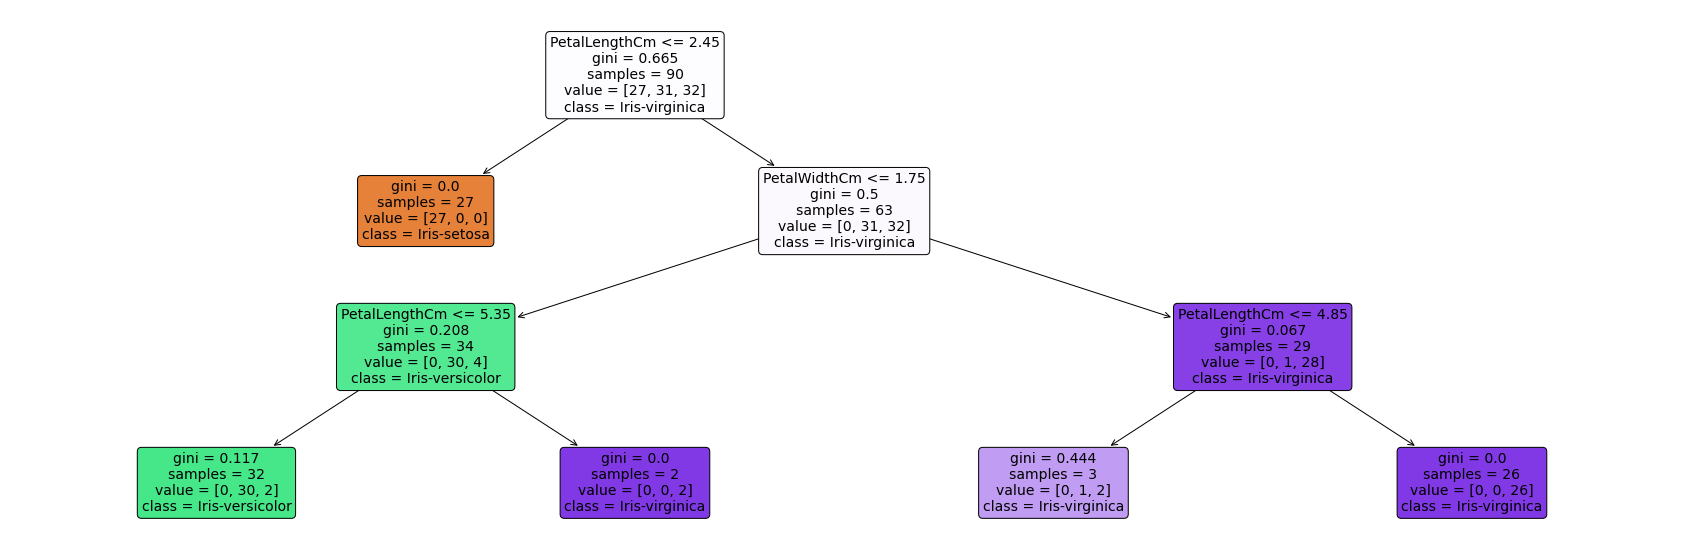

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
a = tree.plot_tree(iris_model,
                   #use the feature names stored
                   feature_names = header_list,
                   #use the class names stored
                   class_names = target_names,
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()

# Scatter plot

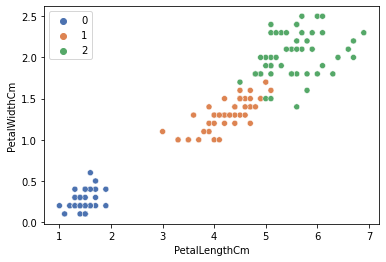

In [ ]:
 import seaborn as sn
sn.scatterplot(data=iris_df,x=iris_df["PetalLengthCm"],y=iris_df["PetalWidthCm"],hue=y,palette="deep")